## Goal: Simulate, visualize and test output data 

In [14]:
import scipy
from scipy import stats
from scipy import special
from scipy.stats import beta
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import palettable as pal
from matplotlib.colors import LogNorm

%matplotlib inline


### Definitions

def visualize_heatmap(df, axs, cmap, output_filename, fig,vmin = .01, vmax = 1e9, mean=True):
    df2=df.copy()
    if mean == True: 
        df2['mean']=df2.mean(axis=1)
        df2.loc['mean_ind']=df2.mean(axis=0)
    else:
        df2['mean']=df2.median(axis=1)
        df2.loc['mean_ind']=df2.median(axis=0)
    df2=df2.sort_values('mean')
    df2=df2.T.sort_values('mean_ind').T
    df2=df2.T.drop('mean').T
    df2=df2.drop('mean_ind')
    h=ax.pcolor(df2, cmap=cmap, norm=LogNorm(vmin=vmin, vmax=vmax))
    ax.margins(0,0)
    fig.colorbar(h)
    fig.savefig(output_filename+".png")
        
def calc_TPM(df):
    # sum across species
    # divide each gene value by the sum
    # multiply by 1e6
    df2=df.copy()
    df2 = df2.astype('float')
    df2['sum']=df2.sum(axis=1)
    df2 = df2.T / df2['sum']
    df2 = df2.drop('sum')
    df2 = df2.T * 1e6
    return df2

## 1. Checking out the default parameters for simulate_counts.py

In [15]:
%run simulate_counts.py -o default_parameters

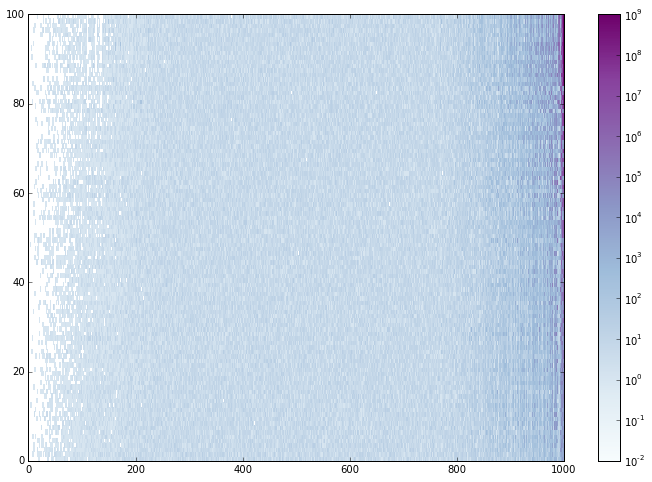

In [17]:
cmap=pal.colorbrewer.sequential.BuPu_8.get_mpl_colormap()

df=pd.read_csv('default_parameters_sim_gene_counts.csv' , index_col=0)
#df_small=df.T
df_small=df.T.head(10).T
fig, ax = plt.subplots(1)
fig.set_size_inches(12,8)
visualize_heatmap(df, ax, cmap, "default_parameters",fig)


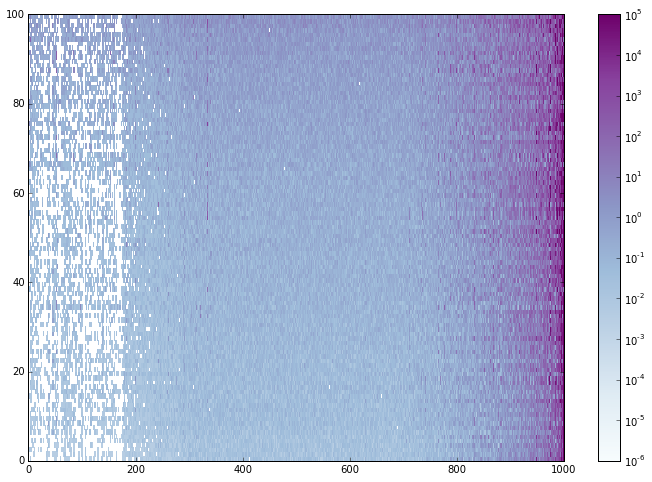

In [6]:
df_TPM = calc_TPM(df)
fig, ax = plt.subplots(1)
fig.set_size_inches(12,8)
visualize_heatmap(df_TPM, ax, cmap, "default_parameters_TPM",fig,vmin=1e-6, vmax=1e5, mean=False)

### General observations:

- Wide variability in the total number of reads generated for each organism (this might not be perfect for our comparison as most organisms should be within 1 or 2 orders of mag. of each other)

- Want: more genes that are not common across taxa

- Want: more organisms that have constitutive expression of genes (evenness) 

## 2. Looking at different parameters with simulate_counts.py

### Goal: increase number of zero counts

In [88]:
p1 = 5
p2 = 1
b1 = 5
b2 = 1
mf = 2
output_name = "beta_prop_"+str(p1)+"_"+str(p2)+"_beta_gene_"+str(b1)+"_"+str(b2)+"_mult_fact_"+str(mf)+"_"
%run simulate_counts.py -o $output_name -p1 $p1 -p2 $p2 -b1 $b1 -b2 $b2 -mf $mf
#df_dist=pd.DataFrame(beta.rvs(p1,p2,size=1000))
#df_dist.plot(kind='hist',bins=20)



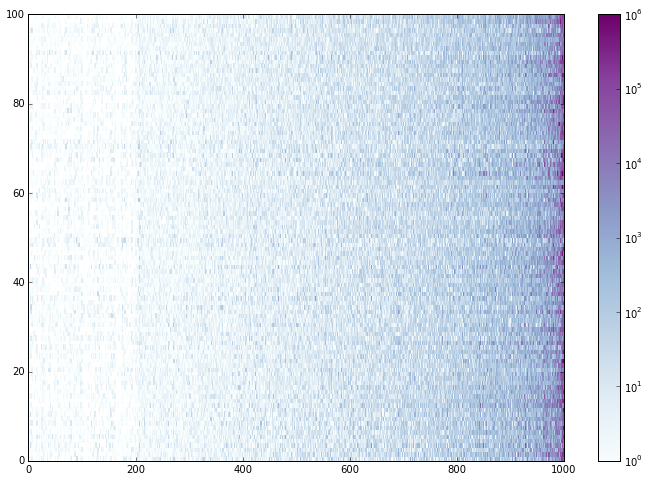

In [89]:
cmap=pal.colorbrewer.sequential.BuPu_8.get_mpl_colormap()

df=pd.read_csv(output_name+"_sim_gene_counts.csv", index_col=0)

fig, ax = plt.subplots(1)
fig.set_size_inches(12,8)
visualize_heatmap(df, ax, cmap, output_name,fig,vmin=1e0, vmax=1e6, mean=False)


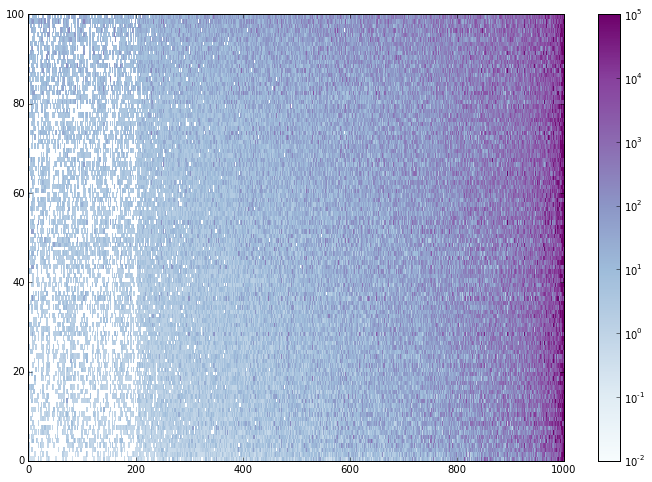

In [90]:
df_TPM = calc_TPM(df)
fig, ax = plt.subplots(1)
fig.set_size_inches(12,8)
visualize_heatmap(df_TPM, ax, cmap, output_name+"_TPM",fig,vmin=1e-2, vmax=1e5, mean=False)

0      477990
1     3578935
2      681233
3       92690
4      386496
5      704411
6      963925
7      379656
8     1362294
9      876801
10     254957
11     317199
12    1345172
13     389461
14     199255
15     210778
16     599434
17     104356
18     685491
19     566760
20     168138
21     422448
22     561449
23     295318
24     150162
25     229155
26    1804222
27     973518
28     417626
29     653553
       ...   
70     153684
71    1031797
72     870520
73     924633
74     947693
75     526829
76     601608
77     628598
78     810818
79     212402
80     432572
81     540672
82     706222
83     113388
84     321033
85     181010
86    2129146
87     835949
88     376345
89     662614
90     384683
91     192424
92     126460
93    1491363
94    1246068
95     518528
96     303244
97     435992
98     847436
99    1037367
dtype: int64

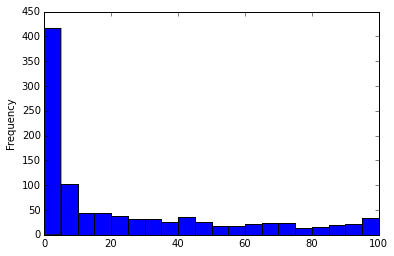

In [91]:
df[df==0].count().plot(kind="hist",bins=20)
df.sum(axis=1)

## Real Data from Coscinodiscus field isoalte

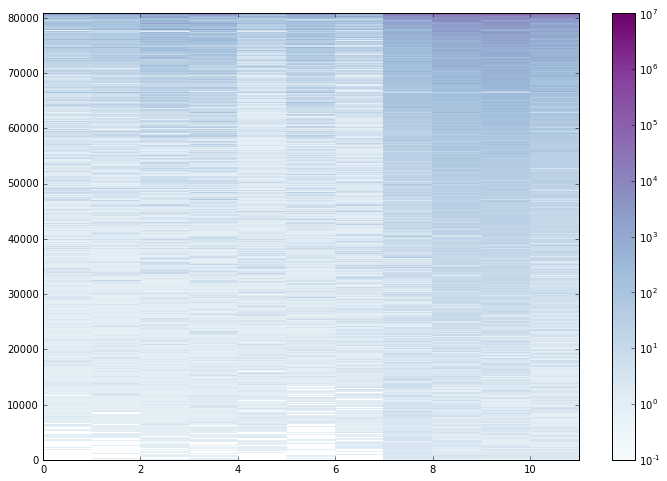

In [100]:
real=pd.read_table('../data/Cosci_Gene_ExpectedCounts.tab',index_col=0)
real=real.T.drop('Unnamed: 1').T

fig, ax = plt.subplots(1)
fig.set_size_inches(12,8)
visualize_heatmap(real, ax, cmap, fig, vmin=1e-1, vmax=1e7)

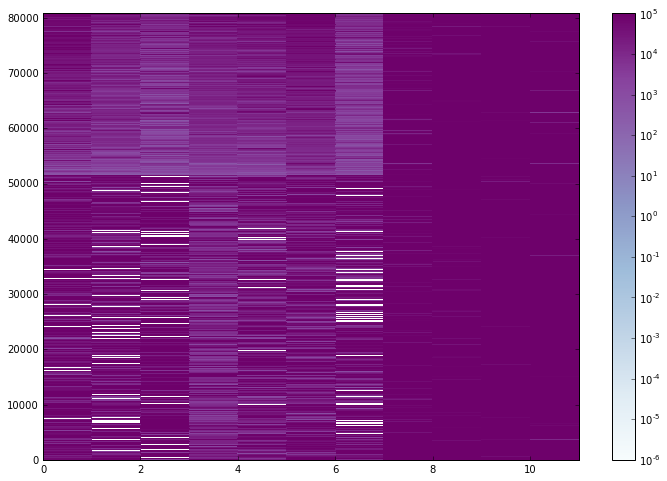

In [101]:
real_TPM = calc_TPM(real)
fig, ax = plt.subplots(1)
fig.set_size_inches(12,8)
visualize_heatmap(real_TPM, ax, cmap, fig,vmin=1e-6, vmax=1e5, mean=False)